In [83]:
# Importation des bibliothèques principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


warnings.filterwarnings(
    "ignore", category=DeprecationWarning
)

In [84]:
## Set option pandas

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.max_colwidth', None)

Le statisticien de la maternité de Bourgogne nous a transmis un jeu de données contenant 60 000 observations et 100 variables. Ces données sont déjà nettoyées et validées en grandes parties puisqu'elles servent à la production du rapport annuel des établissements.

In [85]:
# ### chargement de la base de donnée communiquer par le statisticien de la maternité de Bourgogne ainsi que le dicionnaire de variable associé et transformation au format adapté csv

data=pd.read_excel('Project/Bourgogne20132023.xls', engine='xlrd')
data.to_csv('Project/Bourgogne20132023.csv', index=False)

dico_var=pd.read_excel('Project/Dictionnaire variables.xlsx', engine='openpyxl')
dico_var.to_csv('Project/dico_var.csv', index=False)



In [86]:
data=pd.read_csv('Project/Bourgogne20132023.csv', low_memory=False)
data.head()


,id_chain,id_acc,terme,poids_mere,taille_mere,parite,Dosecortico,sdecl,codepost,type_grossesse,Aide_procreation,allaitement_mat,AMP,code_cesa,ERCF_stade,type_extr_i,diagnostique_reg,la,age_m,rss_acc,dat_acc,annee,niveau,bmi,acc_hh,allait,anest_peri,avort_spon,cesa,cesa_avt,cholestase,chorio,cortico,dc_mat,dech,decl,diabete,eclamps,embo,episio,ercf_ht,ercf_pdt,extr_i,g_type,hdd,hellp,hpp,hrp,hta_chro,hta_gest,hydramn,hyst,img,liga,map,oligo,pma,preecl,present,procid,rciu,rpm12,rpm37,rupt_ut,tr_rea,tr_sg,ut_cica,tiu,gene,meconium,Parite_PMS,Anest_gene,Act_pres,creta,pph_hemo,Tampo_int,tabac,hosp_m_g,dsm_g,hosp_m_a,dsm_acc,dsm_post,dsm_tot,bilan,nbilan,sej18,nsej18,d_naiss,sexe,apgar5,pc,crib,pHa,poi_nais,percent_be,percent_bh,dbp,deces,det_resp,ecat_malf,inf_bac_e,intub,malf,neuro,surf,tr_sg_e,vcpap,vm,ecun,ischemie,hiv,lmpv,rop,eai,hosp,hosp_rea,hosp_neo,hosp_ped,hosp_kan,d_mat,d_rea,d_neo,d_hosp,Declenchement,Autre_debut_trav,indication_decl,Autre_indication_decl,precision_decl,Autre_precision_decl,duree_rup_h,apgar1,apgar10,ph_veineux,parite_cor,map_cor,bas_risque,hta_tot,vitalite,mod_acc,mp,morti_peri,CodePSL,cgr,nb_cgr,hpp_trans
0,1,1,39.900000,NaN,NaN,NaN,NaN,NaN,21220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210780110,28.000000,572188,2014-01-31,2014,2.200000,NaN,0,0,1,0,0,NaN,0,0,0,0,0,NaN,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.000000,0,0.000000,0,0,0,0,1,2.000000,0,0,4.000000,6.000000,0,0,1,1,2014-01-31,2,NaN,NaN,NaN,NaN,3540.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risque,0,vivant,vb,0,0,NaN,NaN,NaN,0
1,1,1,41.600000,74.000000,178.000000,0.000000,NaN,0,21201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210012175,27.000000,266272,2015-01-04,2015,1.200000,23.400000,0,1,1,0,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.000000,0,0,0,0,1,2.000000,0,0,6.000000,8.000000,0,0,0,0,2015-01-04,1,10.000000,36.500000,NaN,NaN,3920.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Risque,0,vivant,vb,0,0,NaN,NaN,NaN,0
2,1,1,41.200000,62.000000,167.000000,2.000000,NaN,NaN,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210011367,36.000000,7937,2017-10-01,2017,2.200000,22.200000,0,0,1,0,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0.000000,0,0,0,0,1,1.000000,0,0,3.000000,4.000000,0,0,0,0,2017-10-01,1,10.000000,NaN,NaN,7.250000,3310.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risque,0,vivant,vb,0,0,NaN,NaN,NaN,0
3,1,1,38.600000,43.000000,159.000000,0.000000,NaN,NaN,21700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210012175,35.000000,43383,2018-04-15,2018,1.200000,17.000000,0,1,1,0,0,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0.000000,0,0,0,0,0,0.000000,0,0,4.000000,4.000000,0,0,0,0,2018-04-15,2,10.000000,33.500000,NaN,NaN,2890.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risque,0,vivant,extri,0,0,NaN,NaN,NaN,0
4,2,1,39.900000,NaN,NaN,NaN,NaN,NaN,21000,NaN,NaN,NaN

In [87]:

description=pd.read_csv('Project/dico_var.csv',index_col=0)
description.sort_index()


,Intitulé/modalités
Variables,
AMP,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)"
Act_pres,Acte presentation\n0:Presentation cephalique\n1:Presentation du siege\n2:Grossesse multiple\n3:Cesarienne
Aide_procreation,Procréation : Non/Oui
Anest_gene,Anesthesie generale (0 : Non/1 : Oui)
Autre_debut_trav,Autre début travail
Autre_indication_decl,Autre Indication de déclenchement
Autre_precision_decl,Autre précision de déclenchement
CodePSL,Code du produit sanguin administré
Declenchement,Declenchement


 En collaboration avec le statisticien, et en l'absence d'un spécialiste en gynécologie, nous avons fait appel à un modèle de langage avancé (LLM) pour nous guider dans la sélection des variables pertinentes:
 - Nous avons retenu uniquement les variables disponibles avant l'accouchement pour garantir la cohérence temporelle de nos prédictions et éviter tout biais lié à des fuites de données
 
 Nous avons écarté les variables non informatives comme les identifiants qui n'apportent pas de valeur prédictive

In [88]:
# --- 1) Variables clairement disponibles avant l'accouchement ---
variables_pre_accouchement = [
    # Identifiants / Démographiques
    # "id_chain",        # Identifiant patient
    # "id_acc",          # Identifiant de l'accouchement
    # "annee",           # Année (peu pertinent en modélisation directe, mais OK)
    "age_m",           # Âge maternel
    "poids_mere",      # Poids (pré-grossesse ou début de grossesse)
    "taille_mere",     # Taille
    "bmi",             # IMC calculé au 1er ou 2ᵉ trimestre
    "tabac",           # Tabagisme déclaré en fin de grossesse
    "parite",          # Parité
    "parite_cor",      # Parité corrigée (si renseignée en amont)

    # Pathologies / Comorbidités préexistantes ou diagnostiquées en suivi
    "diabete",         # 0: Non, 1: Diabète préexistant, 2: Diabète gestationnel
    "hta_chro",        # Hypertension artérielle chronique
    "hta_gest",        # Hypertension gravidique
    "hta_tot",         # HTA total (chronique + gravidique)
    "cholestase",      # Cholestase gravidique (diagnostic prénatal confirmé)
    "preecl",          # Pré-éclampsie (si confirmée pendant la grossesse)
    "hellp",           # HELLP (si découvert avant l'accouchement)

    # Statut / Type de grossesse
    "type_grossesse",  # Mono / multiple
    "g_type",          # 1: mono / 2: multiple
    # "diagnostique_reg", # Si code CIM10 ou antécédent placenta praevia diagnostiqué
    "creta",           # Placenta accreta / percreta, si connu prénatalement
    "ut_cica",         # Utérus cicatriciel (antécédent de césarienne)
    "Dosecortico",     # Dose cumulée de corticoïdes anténataux
    "cortico",         # Corticothérapie antenatale 0/1

    # Aide médicale à la procréation
    "Aide_procreation",
    "AMP",
    "pma",

    # Hospitalisations / Bilans prénataux
    "hosp_m_g",        # Hospitalisation pendant la grossesse (0/1)
    "dsm_g",           # Durée de l’hospitalisation pendant la grossesse
    "bilan",           # Bilan réalisé en cours de grossesse
    "nbilan",          # Nombre de bilans
    "sej18",           # Séjours < 18 SA
    "nsej18",          # Nombre de séjours < 18 SA

    # Terme (approximatif, si on prend le terme « prévu » ou estimé)
    "terme",           # En théorie, le « terme » est connu en suivi prénatal
    
    # Indicateurs divers (si ils sont réellement fixés prénatalement)
    "bas_risque"       # Grossesse considérée "bas risque" (0/1) en prénatal
]

# --- 2) Variables "borderline" (peuvent être connues avant ou durant l’accouchement) ---
variables_borderline = [
    "sdecl",              # Déclenchement: dans certains cas, programmé avant admission
    "Declenchement",      # Idem (autre codage)
    "indication_decl",    # Indication du déclenchement (parfois connue avant, parfois intrapartum)
    "cesa",               # Valeur si césarienne programmée vs urgence (souvent intrapartum)
    "cesa_avt",           # Césarienne avant travail (si réellement planifiée, possible à l’avance)
    "code_cesa",          # Souvent catégorisé en "rouge/vert/orange" etc.
    "parite_cor",         # Selon la façon dont c’est codé, peut être borderline
    "map",                # Menace d’accouchement prématuré (parfois découverte le jour J)
    "chorio",             # Chorioamniotite (souvent intrapartum, mais peut être évoquée avant)
    "Autre_debut_trav",   # Raisons ou type de début de travail (parfois on le sait avant l’entrée)
    "precision_decl",
    "Autre_precision_decl"
]

# --- 3) Variables intrapartum / post-partum (à exclure pour éviter la fuite de données) ---
variables_intra_post = [
    # Actes ou événements intrapartum
    "anest_peri",         # Péridurale (0/1) => décidé pendant l’accouchement
    "gene",               # Anesthésie générale (0/1)
    "Anest_gene",         # Idem, double codage
    "extr_i",             # Extraction instrumentale (forceps, ventouse...)
    "type_extr_i",        # Type d’extraction
    "episio",             # Épisiotomie
    "ercf_ht",            # Anomalie RCF hors travail (si c’est *réellement* intrapartum)
    "ercf_pdt",           # Anomalie RCF pendant travail
    "ERCF_stade",         # Cotation C1-C5 du rythme cardiaque fœtal
    "arcf",               # Anomalie RCF (0/1), constatée en salle
    "present",            # Présentation finale de l’enfant à l’accouchement
    "meconium",           # Liquide méconial (découvert en intrapartum)
    "hrp",                # Hématome rétroplacentaire (urgence intrapartum)
    "rupt_ut",            # Rupture utérine
    "procid",             # Procidence du cordon
    "duree_rup_h",        # Durée de rupture des membranes
    "rpm12",              # Rupture précoce des membranes (<24h / >24h)
    "rpm37",              # Rupture prolongée des membranes
    "mod_acc",            # Mode d’accouchement (voie basse, instrumentale, etc.)

    # Variables HPP, transfusion, etc. (outcomes ou post-partum)
    "hpp",                # Hémorragie du post-partum
    "hpp_trans",          # HPP transfusée
    "HPPsev",             # HPP sévère (0/1)
    "tr_sg",              # Transfusion (0/1)
    "cgr",                # Délai administration culots (post-partum)
    "nb_cgr",             # Nombre de culots
    "tampo_int",          # Tamponnement intra-utérin
    "embo",               # Embolisation
    "hyst",               # Hystérectomie

    # Variables néonatales (post-naissance)
    "apgar1",
    "apgar5",
    "apgar10",
    "pHa",
    "ph_veineux",
    "poi_nais",
    "percent",
    "percent_be",
    "percent_bh",
    "dbp",                # Dysplasie broncho-pulmonaire
    "deces",
    "det_resp",
    "inf_bac_e",
    "intub",
    "malf",
    "neuro",
    "surf",
    "tr_sg_e",
    "vcpap",
    "vm",
    "ecun",
    "ischemie",
    "hiv",
    "lmpv",
    "rop",
    "eai",
    "hosp",
    "hosp_rea",
    "hosp_neo",
    "hosp_ped",
    "hosp_kan",
    "d_mat",
    "d_rea",
    "d_neo",
    "d_hosp",
    "ds_tot_e",
    "delai_dn",
    "retransfert",
    "d_naiss_enfants",    # Date de naissance de l’enfant
]


 Construction d'un DataFrame descriptif contenant :
 - La description des variables
 - Le type de variable (pour le preprocessing en pipeline)
 - L'analyse des valeurs manquantes et des outliers

Pour nous permettre également de faire l'étude des corrélations afin de détecter les variables colinéaires nous utilisons plusieurs methodes:
   - Variables quantitatives : coefficient de corrélation de Pearson
   - Variables catégorielles : test du Khi2 ou corrélation de Kendall
   - Entre variables quantitatives et qualitatives : corrélation point-bisériale ou test de Mann-Whitney

In [89]:

### création du Dataset avac les variables avant accouchement

df_avt_acc=data[variables_pre_accouchement+['hpp_trans']]

In [90]:
### Création d'un dataframe avec describe et des colonnes ajoutant permettant d'ajouter le type de variable , d'analyser les manquants, outliers et faire les modifications

def update_describe(df_avt_acc):
    '''
    Cette fonction enrichit un DataFrame avec des informations descriptives sur les variables.
    
    Elle crée un DataFrame contenant:
    - Une description détaillée de chaque variable
    - La catégorisation du type de variable (binaire, ordinale, nominale, quantitative)
    - Des statistiques sur les valeurs (nombre total, uniques, distribution)
    - Les valeurs extrêmes (min/max)
    
    La fonction retourne:
    - desc: Le DataFrame enrichi avec toutes les informations descriptives
    - cat_bin_features: Liste des variables binaires (2 modalités)
    - cat_ord_features: Liste des variables ordinales (ordre naturel)
    - cat_nom_features: Liste des variables nominales (sans ordre)
    - quant_features: Liste des variables quantitatives (numériques)
    '''
    desc=df_avt_acc.describe(include='all').T
    desc['description']=description['Intitulé/modalités']
    desc['type_var']=''
    desc['nunique'] = df_avt_acc.nunique()
    desc['value_counts'] = df_avt_acc.apply(lambda x: x.value_counts().to_dict() if x.nunique() < 10 else None)
    desc['count'] = desc['count'].astype(int)
    desc=desc[['count','value_counts','nunique','min','max','description','type_var']].sort_values(by='nunique',ascending=False)

    #### Modification apportées au fur et à mesure après lecture du dataset ddesc
    desc.loc[desc['nunique']>=8,'type_var']='Quantitative'
    desc.loc[desc['nunique']==2,'type_var']='Binaire'
    desc.loc['AMP','type_var']='Nominale'
    desc.loc[desc['nunique']==3,'type_var']='Ordinale'
    desc.loc['diabete','type_var']='Nominale'
    desc.loc['AMP','type_var']='Nominale'
    desc.loc['g_type','type_var']='Ordinale'

    cat_bin_features=desc[desc['type_var']=='Binaire'].index.tolist()
    cat_ord_features=desc[desc['type_var']=='Ordinale'].index.tolist()
    cat_nom_features=desc[desc['type_var']=='Nominale'].index.tolist()
    quant_features=desc[desc['type_var']=='Quantitative'].index.tolist()

    return desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features

In [91]:


desc,_,_,_,_=update_describe(df_avt_acc)


desc.sort_values(by='count',ascending=False)


,count,value_counts,nunique,min,max,description,type_var
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
diabete,65535,"{0: 56295, 2: 8781, 1: 459}",3,0.000000,2.000000,Diabete\n0 : Non\n1: Diabete preexistant\n2:Diabete gestationnel,Nominale
g_type,65535,"{1: 64041, 2: 1465, 3: 25, 9: 3, 4: 1}",5,1.000000,9.000000,Type de grossesse\n1:mono\n2:multiple,Ordinale
preecl,65535,"{0: 63923, 1: 1182, 2: 430}",3,0.000000,2.000000,Preeclampsie (0 : Non/1 : Oui),Ordinale
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
sej18,65535,"{0: 61525, 1: 4010}",2,0.000000,1.000000,Sejours < 18 SA,Binaire
creta,65535,"{0: 65491, 1: 44}",2,0.000000,1.000000,Placenta acreta (0 : Non/1 : Oui),Binaire
tabac,65535,"{0: 55037, 1: 10498}",2,0.000000,1.000000,Tabac (0 : Non/1 : Oui),Binaire


In [92]:
### Pour les cas sans assistance médicale à la procréation (AMP), nous ajoutons la catégorie "Aucune" afin de compléter les valeurs manquantes, sans modifier la distribution des données existantes.

df_avt_acc.loc[:, 'AMP'] = df_avt_acc['AMP'].fillna('Aucune')
desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features=update_describe(df_avt_acc)

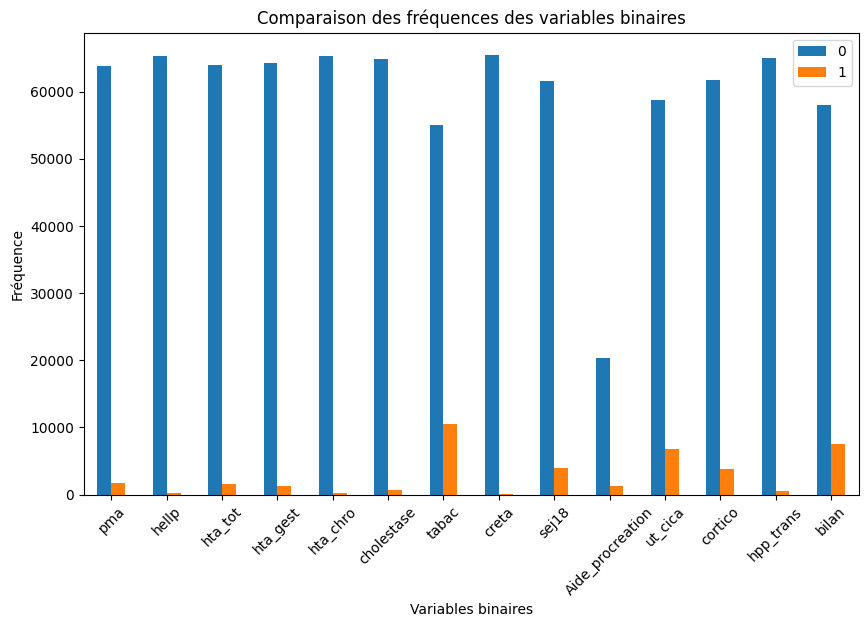

In [93]:
import matplotlib.pyplot as plt

df_avt_acc[cat_bin_features].apply(pd.Series.value_counts).T.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Fréquence")
plt.xlabel("Variables binaires")
plt.title("Comparaison des fréquences des variables binaires")
plt.xticks(rotation=45)
plt.show()

array([[<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'terme'}>,
        <Axes: title={'center': 'poids_mere'}>],
       [<Axes: title={'center': 'dsm_g'}>,
        <Axes: title={'center': 'taille_mere'}>,
        <Axes: title={'center': 'age_m'}>],
       [<Axes: title={'center': 'parite'}>,
        <Axes: title={'center': 'nbilan'}>,
        <Axes: title={'center': 'hosp_m_g'}>],
       [<Axes: title={'center': 'Dosecortico'}>,
        <Axes: title={'center': 'nsej18'}>, <Axes: >]], dtype=object)

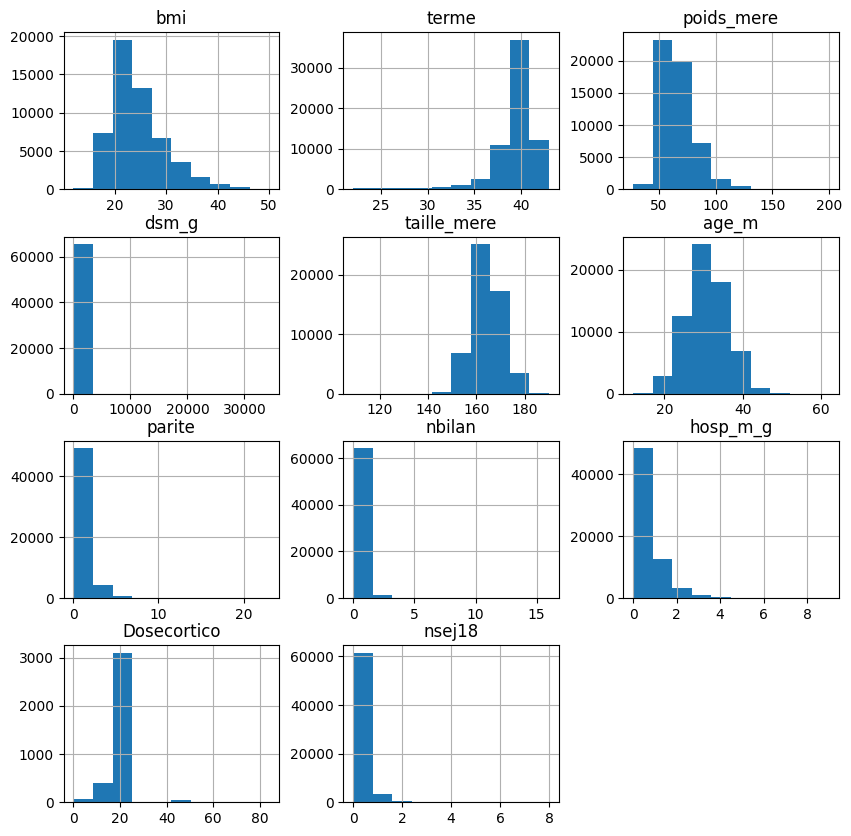

In [94]:
### Analyse graphique de la distribution des variables quantitatives continue ou discrète

df_avt_acc[quant_features].hist(figsize=(10,10))

array([[<Axes: title={'center': 'diabete'}>,
        <Axes: title={'center': 'g_type'}>],
       [<Axes: title={'center': 'preecl'}>, <Axes: >]], dtype=object)

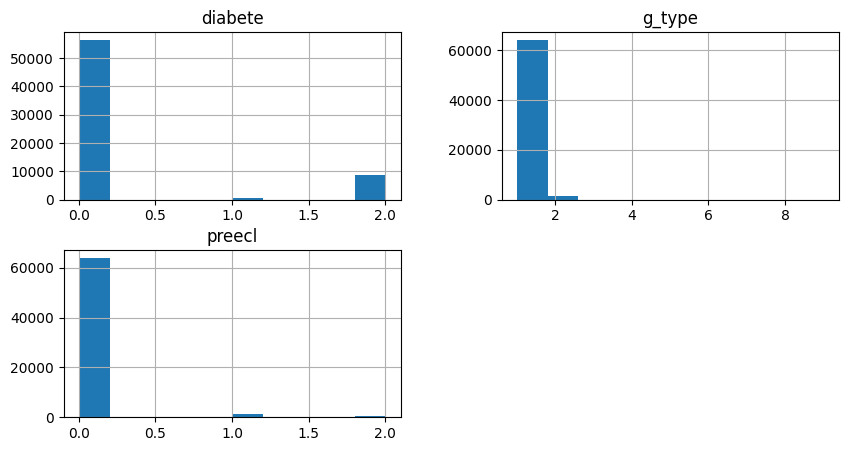

In [95]:
df_avt_acc[cat_nom_features+cat_ord_features].hist(figsize=(10,5))

<Axes: >

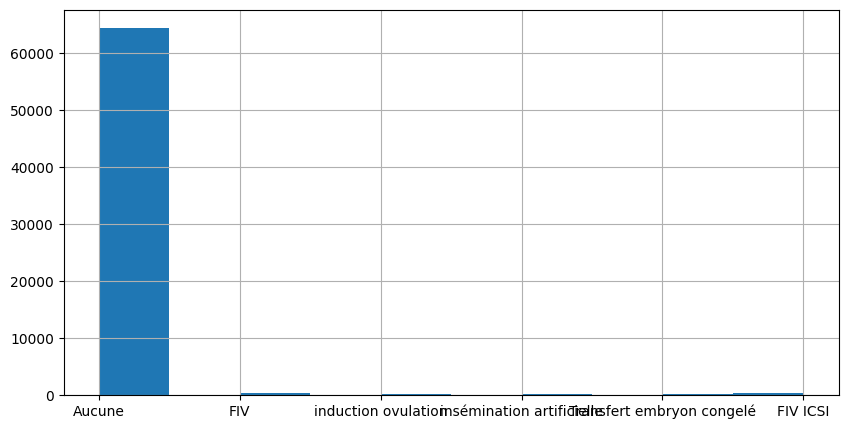

In [96]:
df_avt_acc['AMP'].hist(figsize=(10,5))

In [97]:
desc.sort_values(by='count',ascending=False)

,count,value_counts,nunique,min,max,description,type_var
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
diabete,65535,"{0: 56295, 2: 8781, 1: 459}",3,0.000000,2.000000,Diabete\n0 : Non\n1: Diabete preexistant\n2:Diabete gestationnel,Nominale
preecl,65535,"{0: 63923, 1: 1182, 2: 430}",3,0.000000,2.000000,Preeclampsie (0 : Non/1 : Oui),Ordinale
AMP,65535,"{'Aucune': 64380, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale
g_type,65535,"{1: 64041, 2: 1465, 3: 25, 9: 3, 4: 1}",5,1.000000,9.000000,Type de grossesse\n1:mono\n2:multiple,Ordinale
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
creta,65535,"{0: 65491, 1: 44}",2,0.000000,1.000000,Placenta acreta (0 : Non/1 : Oui),Binaire
tabac,65535,"{0: 55037, 1: 10498}",2,0.000000,1.000000,Tabac (0 : Non/1 : Oui),Binaire


In [98]:
df_avt_acc[['type_grossesse','g_type']].groupby('g_type').value_counts()

g_type  type_grossesse                          
1       monofoetale                                 21093
        gémellaire bi choriale-bi amniotique            4
        gémellaire mono choriale-bi amniotique          1
        monofeotale                                     1
        triple                                          1
2       gémellaire bi choriale-bi amniotique          369
        gémellaire mono choriale-bi amniotique         86
        monofoetale                                    17
        gémellaire mono choriale-mono amniotique        7
        triple                                          1
3       triple                                          6
        gémellaire bi choriale-bi amniotique            1
4       quadruple                                       1
9       monofoetale                                     1
Name: count, dtype: int64

In [99]:

# Créer un mapping numérique pour type_grossesse
type_mapping = {
    'monofoetale': 1,
    'gémellaire bi choriale-bi amniotique': 2, 
    'gémellaire mono choriale-bi amniotique': 2,
    'gémellaire mono choriale-mono amniotique': 2,
    'triple': 3,
    'quadruple': 4
}

# Calculer la corrélation de Spearman entre type_grossesse et g_type
df = data.dropna(subset=['type_grossesse', 'g_type']).copy()
df.loc[:,'type_grossesse_num'] = df['type_grossesse'].map(type_mapping)
df[['type_grossesse_num','g_type']].corr(method='kendall')

,type_grossesse_num,g_type
type_grossesse_num,1.000000,0.974500
g_type,0.974500,1.000000


Les variables type_grossesse et g_type montrent une forte colinéarité avec un coefficient de corrélation élevé. Étant donné que g_type contient moins de données manquantes, nous retiendrons cette variable et écarterons type_grossesse de notre analyse.

In [100]:
df_avt_acc=df_avt_acc.drop(columns=['type_grossesse'])
desc,_,_,_,_=update_describe(df_avt_acc)
desc.sort_values(by='count',ascending=False)


,count,value_counts,nunique,min,max,description,type_var
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
g_type,65535,"{1: 64041, 2: 1465, 3: 25, 9: 3, 4: 1}",5,1.000000,9.000000,Type de grossesse\n1:mono\n2:multiple,Ordinale
preecl,65535,"{0: 63923, 1: 1182, 2: 430}",3,0.000000,2.000000,Preeclampsie (0 : Non/1 : Oui),Ordinale
AMP,65535,"{'Aucune': 64380, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
diabete,65535,"{0: 56295, 2: 8781, 1: 459}",3,0.000000,2.000000,Diabete\n0 : Non\n1: Diabete preexistant\n2:Diabete gestationnel,Nominale
tabac,65535,"{0: 55037, 1: 10498}",2,0.000000,1.000000,Tabac (0 : Non/1 : Oui),Binaire
hta_tot,65535,"{0: 64010, 1: 1525}",2,0.000000,1.000000,HTA total (chronique + gravidique),Binaire


Suppression des variables parite_cor et bas_risque en raison de leur faible valeur informative (déséquilibre important dans la distribution des données ou données manquantes)

In [101]:
df_avt_acc=df_avt_acc.drop(columns=['parite_cor','bas_risque'])
desc,_,_,_,_=update_describe(df_avt_acc)
desc.sort_values(by='count',ascending=False)






,count,value_counts,nunique,min,max,description,type_var
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
AMP,65535,"{'Aucune': 64380, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
g_type,65535,"{1: 64041, 2: 1465, 3: 25, 9: 3, 4: 1}",5,1.000000,9.000000,Type de grossesse\n1:mono\n2:multiple,Ordinale
hta_tot,65535,"{0: 64010, 1: 1525}",2,0.000000,1.000000,HTA total (chronique + gravidique),Binaire
tabac,65535,"{0: 55037, 1: 10498}",2,0.000000,1.000000,Tabac (0 : Non/1 : Oui),Binaire
hta_chro,65535,"{0: 65296, 1: 239}",2,0.000000,1.000000,Hypertension arterielle chronique (0 : Non/1 : Oui),Binaire
cholestase,65535,"{0: 64847, 1: 688}",2,0.000000,1.000000,Cholestase gravidique (0 : Non/1 : Oui),Binaire


In [102]:
df_avt_acc[['Aide_procreation','AMP']].groupby('Aide_procreation').value_counts()

Aide_procreation  AMP                      
0.000000          Aucune                       20322
                  FIV                              1
1.000000          FIV                            352
                  FIV ICSI                       229
                  Transfert embryon congelé      217
                  induction ovulation            185
                  insémination artificielle      171
                  Aucune                         108
Name: count, dtype: int64

In [103]:
df_avt_acc[['cortico','Dosecortico']].groupby('cortico').value_counts()


cortico  Dosecortico
0        0.000000         68
         24.000000        12
         12.000000         2
1        24.000000      3090
         12.000000       400
         48.000000        48
         36.000000        13
         60.000000         2
         0.000000          1
         17.000000         1
         72.000000         1
         84.000000         1
Name: count, dtype: int64

In [104]:
df_avt_acc[['dsm_g','hosp_m_g']].corr(method='kendall')

,dsm_g,hosp_m_g
dsm_g,1.000000,0.944033
hosp_m_g,0.944033,1.000000


In [105]:
df_avt_acc[['sej18','nsej18']].dropna().corr(method='kendall')

,sej18,nsej18
sej18,1.000000,0.996162
nsej18,0.996162,1.000000


In [106]:

from scipy.stats import pointbiserialr

# Calculer la corrélation point-bisériale*
df=data.dropna(subset=['cortico','Dosecortico'])
corr, p_value = pointbiserialr(df["cortico"], df["Dosecortico"])
print(f"Corrélation point-bisériale : {corr:.3f}, p-value : {p_value:.3f}")

Corrélation point-bisériale : 0.480, p-value : 0.000


In [107]:
from scipy.stats import chi2_contingency
import numpy as np

# Créer une table de contingence entre AMP et Aide_procreation
contingency_table = pd.crosstab(df_avt_acc['AMP'], df_avt_acc['Aide_procreation'])

# Effectuer le test du chi2
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Calculer le V de Cramer
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"V de Cramer : {cramer_v:.3f}")
print(f"Statistique du chi2 : {chi2:.3f}")
print(f"p-value : {p_value:.3f}")
print(f"Degrés de liberté : {dof}")


V de Cramer : 0.953
Statistique du chi2 : 19615.340
p-value : 0.000
Degrés de liberté : 5


 Analyse des corrélations et choix des variables :

 - AMP et Aide_procreation présentent une très forte corrélation (colinéarité). 
   Je conserve uniquement AMP qui comporte moins de données manquantes.

 - Dosecortico et cortico ont une corrélation relativement faible.
   Je garde uniquement cortico car Dosecortico contient trop de valeurs manquantes.

 - sej18 et nsej18 sont fortement corrélées (colinéarité).
   Je retiens nsej18 qui, étant une variable quantitative, apporte plus d'information que sej18.

In [108]:
df_avt_acc=df_avt_acc.drop(columns=['Aide_procreation','Dosecortico','sej18'])
desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features=update_describe(df_avt_acc)
desc.sort_values(by='count',ascending=False)

,count,value_counts,nunique,min,max,description,type_var
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
hta_gest,65535,"{0: 64218, 1: 1317}",2,0.000000,1.000000,Hypertension arterielle gravidique (0 : Non/1 : Oui),Binaire
hta_tot,65535,"{0: 64010, 1: 1525}",2,0.000000,1.000000,HTA total (chronique + gravidique),Binaire
preecl,65535,"{0: 63923, 1: 1182, 2: 430}",3,0.000000,2.000000,Preeclampsie (0 : Non/1 : Oui),Ordinale
diabete,65535,"{0: 56295, 2: 8781, 1: 459}",3,0.000000,2.000000,Diabete\n0 : Non\n1: Diabete preexistant\n2:Diabete gestationnel,Nominale
g_type,65535,"{1: 64041, 2: 1465, 3: 25, 9: 3, 4: 1}",5,1.000000,9.000000,Type de grossesse\n1:mono\n2:multiple,Ordinale
AMP,65535,"{'Aucune': 64380, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale


La matrice de corrélation ci-dessous met en évidence les relations linéaires significatives entre les différentes variables quantitatives de notre jeu de données

In [109]:
corr_matrix=df_avt_acc[quant_features].corr()

#
THRESOLD_CORR=0.1
high_corr = corr_matrix[corr_matrix.abs() > THRESOLD_CORR].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # Remove self-correlations
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove similar pairs (e.g., (A, B) and (B, A))
high_corr['sorted_vars'] = high_corr.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
high_corr = high_corr.drop_duplicates(subset='sorted_vars').drop(columns='sorted_vars')

high_corr['description_1']=high_corr['Variable 1'].map(desc['description'])
high_corr['description_2']=high_corr['Variable 2'].map(desc['description'])



high_corr.sort_values('Correlation',ascending=False)

,Variable 1,Variable 2,Correlation,description_1,description_2
1,bmi,poids_mere,0.936394,"L'indice de masse corporelle (IMC, ou BMI en anglais) se calcule donc en divisant le poids par la taille au carré",Poids de la mére (en kg)
21,nbilan,nsej18,0.361401,Nb bilans au cours de la grossesse,Nb sejours < 18 SA
14,age_m,parite,0.336729,Age maternel calculé à partir de la date de naissance de la mére et la date d'accocuhement \nexprimé en année,Parité obstétricale : nombre d'enfants issues d'une grossesses antérieure vivants\nou mort-né : de 0 à 9
8,poids_mere,taille_mere,0.287075,Poids de la mére (en kg),Taille de la mére (en cm)
3,bmi,nbilan,0.148802,"L'indice de masse corporelle (IMC, ou BMI en anglais) se calcule donc en divisant le poids par la taille au carré",Nb bilans au cours de la grossesse
9,poids_mere,nbilan,0.129162,Poids de la mére (en kg),Nb bilans au cours de la grossesse
2,bmi,parite,0.110998,"L'indice de masse corporelle (IMC, ou BMI en anglais) se calcule donc en divisant le poids par la taille au carré",Parité obstétricale : nombre d'enfants issues d'une grossesses antérieure vivants\nou mort-né : de 0 à 9
5,terme,hosp_m_g,-0.280435,Terme à l'accouchement en semaine d aménorrhée (SA),Hosp. pendant la grossesse (0 : Non/1 : Oui)


La matrice de corrélation montre une très forte corrélation entre l'IMC (bmi) et le poids de la mère, indiquant une colinéarité. Nous conservons uniquement l'IMC car il est plus complet en intégrant à la fois le poids et la taille au carré dans son calcul.

In [110]:

df_avt_acc=df_avt_acc.drop('poids_mere',axis=1)
desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features=update_describe(df_avt_acc)
desc.sort_values(by='count',ascending=False)


,count,value_counts,nunique,min,max,description,type_var
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
hta_tot,65535,"{0: 64010, 1: 1525}",2,0.000000,1.000000,HTA total (chronique + gravidique),Binaire
preecl,65535,"{0: 63923, 1: 1182, 2: 430}",3,0.000000,2.000000,Preeclampsie (0 : Non/1 : Oui),Ordinale
diabete,65535,"{0: 56295, 2: 8781, 1: 459}",3,0.000000,2.000000,Diabete\n0 : Non\n1: Diabete preexistant\n2:Diabete gestationnel,Nominale
g_type,65535,"{1: 64041, 2: 1465, 3: 25, 9: 3, 4: 1}",5,1.000000,9.000000,Type de grossesse\n1:mono\n2:multiple,Ordinale
AMP,65535,"{'Aucune': 64380, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale
cortico,65535,"{0: 61649, 1: 3886}",2,0.000000,1.000000,Corticothérapie (0 : Non/1 : Oui),Binaire


La méthode de Kendall est utilisée pour calculer les corrélations entre les variables catégorielles

In [111]:
corr_matrix=df_avt_acc[cat_bin_features+cat_ord_features].corr(method='kendall')

#
THRESOLD_CORR=0.3
high_corr = corr_matrix[corr_matrix.abs() > THRESOLD_CORR].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # Remove self-correlations
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove similar pairs (e.g., (A, B) and (B, A))
high_corr['sorted_vars'] = high_corr.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
high_corr = high_corr.drop_duplicates(subset='sorted_vars').drop(columns='sorted_vars')

high_corr['description_1']=high_corr['Variable 1'].map(desc['description'])
high_corr['description_2']=high_corr['Variable 2'].map(desc['description'])



high_corr.sort_values('Correlation',ascending=False)

,Variable 1,Variable 2,Correlation,description_1,description_2
1,hta_tot,hta_gest,0.927798,HTA total (chronique + gravidique),Hypertension arterielle gravidique (0 : Non/1 : Oui)
2,hta_tot,hta_chro,0.391963,HTA total (chronique + gravidique),Hypertension arterielle chronique (0 : Non/1 : Oui)


L'analyse des corrélations révèle une forte colinéarité entre les variables hta_tot et hta_gest. Étant donné que hta_tot représente la combinaison de hta_gest et hta_chro, nous choisissons de conserver uniquement hta_tot et de supprimer les variables hta_gest et hta_chro qui sont redondantes.

In [112]:

df_avt_acc=df_avt_acc.drop(columns=['hta_gest','hta_chro'])
desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features=update_describe(df_avt_acc)
desc.sort_values(by='nunique',ascending=False)


,count,value_counts,nunique,min,max,description,type_var
bmi,53061,None,359,12.000000,50.000000,"L'indice de masse corporelle (IMC, ou BMI en anglais) se calcule donc en divisant le poids par la taille au carré",Quantitative
terme,65535,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
dsm_g,65512,None,103,-1.000000,34333.000000,Duree hosp. pendant la grossesse,Quantitative
taille_mere,53227,None,55,109.000000,190.000000,Taille de la mére (en cm),Quantitative
age_m,65534,None,42,12.000000,62.000000,Age maternel calculé à partir de la date de naissance de la mére et la date d'accocuhement \nexprimé en année,Quantitative
parite,54214,None,14,0.000000,23.000000,Parité obstétricale : nombre d'enfants issues d'une grossesses antérieure vivants\nou mort-né : de 0 à 9,Quantitative
nbilan,65535,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
hosp_m_g,65535,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
nsej18,65535,"{0: 61525, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
AMP,65535,"{'Aucune': 64380, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale


La variable age_m contient seulement 1 valeur manquante sur 60 000 observations. Nous pouvons donc supprimer cette ligne sans perte significative d'information

In [113]:


df_avt_acc=df_avt_acc.dropna(subset=['age_m'])
desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features=update_describe(df_avt_acc)
desc.sort_values(by='nunique',ascending=False)

,count,value_counts,nunique,min,max,description,type_var
bmi,53061,None,359,12.000000,50.000000,"L'indice de masse corporelle (IMC, ou BMI en anglais) se calcule donc en divisant le poids par la taille au carré",Quantitative
terme,65534,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
dsm_g,65511,None,103,-1.000000,34333.000000,Duree hosp. pendant la grossesse,Quantitative
taille_mere,53227,None,55,109.000000,190.000000,Taille de la mére (en cm),Quantitative
age_m,65534,None,42,12.000000,62.000000,Age maternel calculé à partir de la date de naissance de la mére et la date d'accocuhement \nexprimé en année,Quantitative
parite,54213,None,14,0.000000,23.000000,Parité obstétricale : nombre d'enfants issues d'une grossesses antérieure vivants\nou mort-né : de 0 à 9,Quantitative
nbilan,65534,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
hosp_m_g,65534,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
nsej18,65534,"{0: 61524, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
AMP,65534,"{'Aucune': 64379, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale


L'analyse de la variable dsm_g (durée de séjour pendant la grossesse) révèle des valeurs incohérentes : certaines sont négatives et d'autres dépassent la durée maximale possible d'une grossesse (270 jours soit 9 mois). Ces données devront être traitées.

In [114]:
df_avt_acc['dsm_g'].value_counts().sort_index()

dsm_g
-1.000000           3
0.000000        48458
1.000000         2781
2.000000         4875
3.000000         2520
4.000000         1482
5.000000         1009
6.000000          707
7.000000          527
8.000000          413
9.000000          314
10.000000         269
11.000000         207
12.000000         182
13.000000         158
14.000000         155
15.000000         123
16.000000         123
17.000000          97
18.000000          74
19.000000          70
20.000000          79
21.000000          73
22.000000          65
23.000000          59
24.000000          36
25.000000          39
26.000000          40
27.000000          28
28.000000          30
29.000000          27
30.000000          27
31.000000          32
32.000000          30
33.000000          24
34.000000          18
35.000000          22
36.000000          17
37.000000          19
38.000000          20
39.000000          17
40.000000          12
41.000000          14
42.000000          17
43.000000           9
44.0

In [115]:
df_avt_acc['dsm_g']=df_avt_acc.loc[(df_avt_acc['dsm_g']>=0) & (df_avt_acc['dsm_g']<270),'dsm_g']
desc,cat_bin_features,cat_ord_features,cat_nom_features,quant_features=update_describe(df_avt_acc)
desc.sort_values(by='nunique',ascending=False)


,count,value_counts,nunique,min,max,description,type_var
bmi,53061,None,359,12.000000,50.000000,"L'indice de masse corporelle (IMC, ou BMI en anglais) se calcule donc en divisant le poids par la taille au carré",Quantitative
terme,65534,None,172,22.000000,43.000000,Terme à l'accouchement en semaine d aménorrhée (SA),Quantitative
dsm_g,65494,None,88,0.000000,102.000000,Duree hosp. pendant la grossesse,Quantitative
taille_mere,53227,None,55,109.000000,190.000000,Taille de la mére (en cm),Quantitative
age_m,65534,None,42,12.000000,62.000000,Age maternel calculé à partir de la date de naissance de la mére et la date d'accocuhement \nexprimé en année,Quantitative
parite,54213,None,14,0.000000,23.000000,Parité obstétricale : nombre d'enfants issues d'une grossesses antérieure vivants\nou mort-né : de 0 à 9,Quantitative
nbilan,65534,None,12,0.000000,16.000000,Nb bilans au cours de la grossesse,Quantitative
hosp_m_g,65534,None,10,0.000000,9.000000,Hosp. pendant la grossesse (0 : Non/1 : Oui),Quantitative
nsej18,65534,"{0: 61524, 1: 3477, 2: 416, 3: 88, 4: 20, 5: 7, 8: 1, 7: 1}",8,0.000000,8.000000,Nb sejours < 18 SA,Quantitative
AMP,65534,"{'Aucune': 64379, 'FIV': 353, 'FIV ICSI': 229, 'Transfert embryon congelé': 217, 'induction ovulation': 185, 'insémination artificielle': 171}",6,NaN,NaN,"Aide médicale à la procréation (FIV, ICSI, TEC, insémination artificielle)",Nominale


In [116]:
print(f'Nombre de ligne avant dropna : {len(df_avt_acc)}')
print(f'Nombre de ligne apres dropna : {len(df_avt_acc.dropna())}')
print(f'Nombre de hpp_trans positif avant dropna : {len(df_avt_acc[df_avt_acc["hpp_trans"]==1])}')
print(f'Nombre de hpp_trans positif apres dropna : {len(df_avt_acc[df_avt_acc["hpp_trans"]==1].dropna())}')







Nombre de ligne avant dropna : 65534
Nombre de ligne apres dropna : 52938
Nombre de hpp_trans positif avant dropna : 471
Nombre de hpp_trans positif apres dropna : 400


In [117]:
df_avt_acc['hpp_trans'].value_counts()


hpp_trans
0    65063
1      471
Name: count, dtype: int64

In [118]:
print(f'Pourcentage de hpp_trans positif avant dropna : {len(df_avt_acc[df_avt_acc["hpp_trans"]==1])/len(df_avt_acc)*100}%')
print(f'Pourcentage de hpp_trans positif apres dropna : {len(df_avt_acc[df_avt_acc["hpp_trans"]==1].dropna())/len(df_avt_acc.dropna())*100}%')

Pourcentage de hpp_trans positif avant dropna : 0.7187108981597339%
Pourcentage de hpp_trans positif apres dropna : 0.7556008916090521%


 L'analyse montre que la variable cible hpp_trans présente une distribution très déséquilibrée entre les classes, ce qui constitue un défi pour la modélisation.

 Pour gérer les valeurs manquantes, nous allons tester et comparer deux approches :
 1. L'imputation des données manquantes en utilisant différentes méthodes (moyenne, médiane, mode) via un pipeline
 2. La suppression des observations incomplètes avec dropna()
 
 La comparaison des performances des modèles nous permettra de sélectionner la meilleure stratégie pour la suite.

In [119]:
df_avt_acc.to_csv('Project/Bourgogne20132023_clean.csv', index=False)
desc,_,_,_,_=update_describe(df_avt_acc)
desc.to_csv('Project/description_variable_clean.csv', index=False)
